<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/11-Seq2seq/intro2s2s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset gen cipherred words
import random
import string
import numpy as np

# Function to apply a Caesar cipher with a given shift
def caesar_cipher(text, shift):
    encrypted_text = ""
    for char in text:
        if char in string.ascii_lowercase:  # Shift only lowercase letters
            new_char = chr(((ord(char) - ord('a') + shift) % 26) + ord('a'))
            encrypted_text += new_char
        else:
            encrypted_text += char  # Keep non-alphabet characters unchanged
    return encrypted_text

# Generate random words and their Caesar-encrypted versions
def random_word(length=5):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

num_samples = 10000
shift = 3  # Fixed shift for encryption

original_words = [random_word() for _ in range(num_samples)]
encrypted_words = [caesar_cipher(word, shift) for word in original_words]

# Character set for encoding
char_set = string.ascii_lowercase
char_to_index = {c: i for i, c in enumerate(char_set, 1)}
index_to_char = {i: c for c, i in char_to_index.items()}

# Convert words to sequences
def encode_word(word, max_length):
    return [char_to_index[c] for c in word] + [0] * (max_length - len(word))  # Padding

max_word_length = max(len(word) for word in original_words)

X = np.array([encode_word(word, max_word_length) for word in encrypted_words])
Y = np.array([encode_word(word, max_word_length) for word in original_words])

X = X.reshape((num_samples, max_word_length, 1))  # Shape for LSTM
Y = Y.reshape((num_samples, max_word_length, 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

In [ ]:




# Define Model
# Encoder
encoder_inputs = Input(shape=(max_word_length, 1))
encoder = LSTM(128, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_word_length, 1))
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(len(char_set) + 1, activation="softmax")  # Output characters
decoder_outputs = decoder_dense(decoder_outputs)

# Full model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])




In [ ]:
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 64, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 6, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, 128), (None,   │         66,560 │ input_layer_4[0][0]    │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, 6, 128),       │         66,560 │ input_layer_5[0][0],   │
│                           │ (None, 128), (None,    │                │ lstm_4[0][1],          │
│                           │ 128)]                  │                │ lstm_4[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 6, 37)          │          4,773 │ lstm_5[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 137,893 (538.64 KB)

 Trainable params: 137,893 (538.64 KB)

 Non-trainable params: 0 (0.00 B)

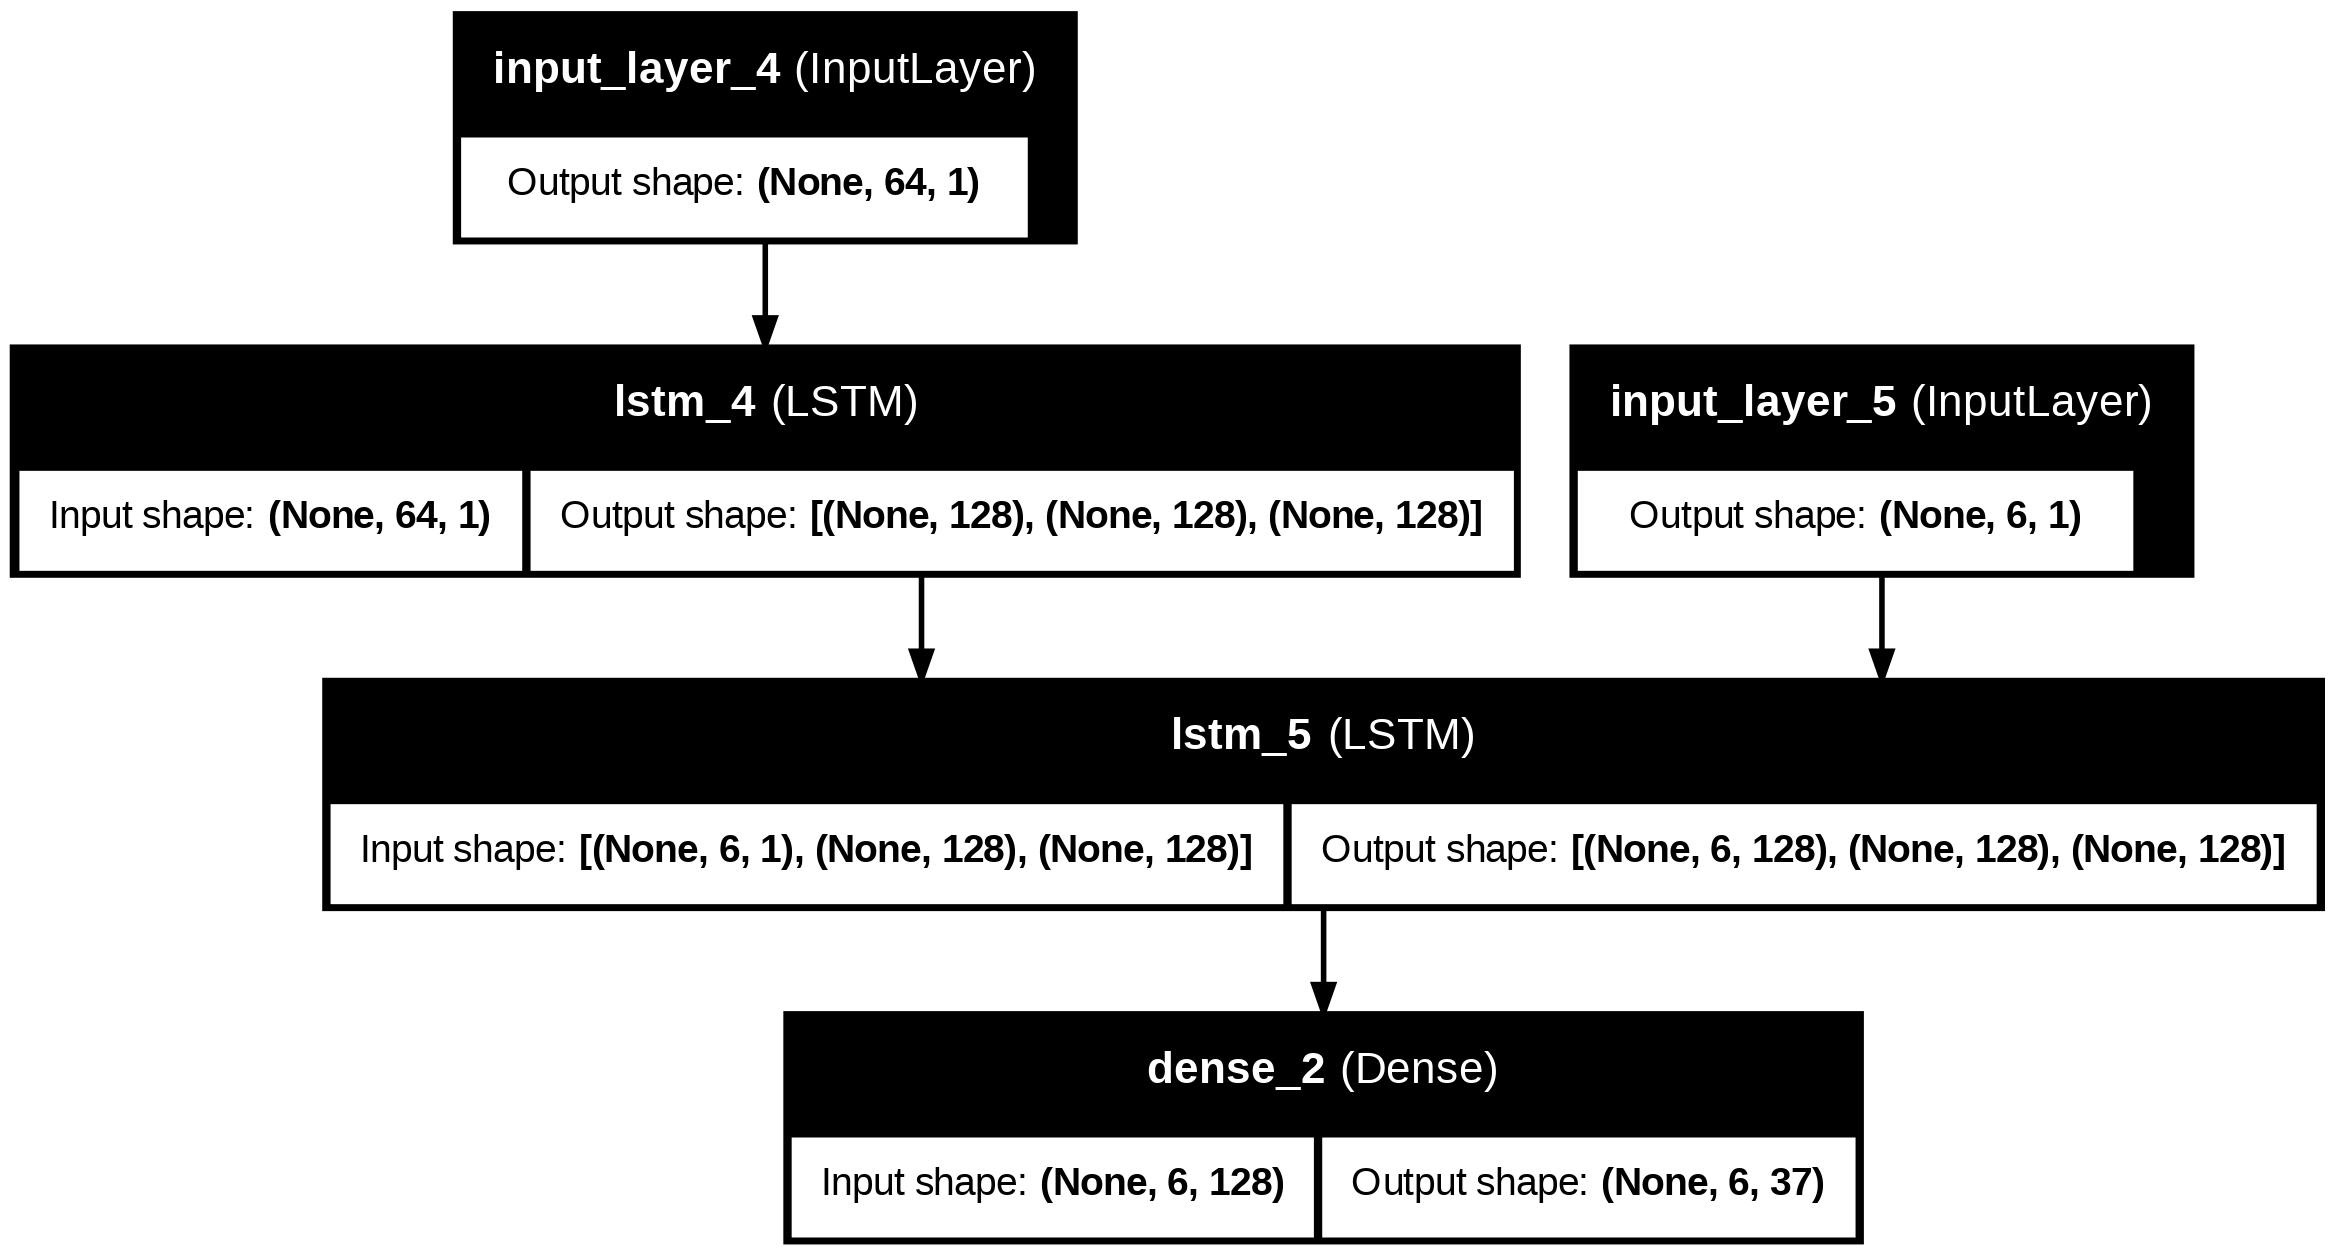

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
# Train the model
history=model.fit([X, Y], Y, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6414 - loss: 1.5501 - val_accuracy: 0.7337 - val_loss: 1.4149
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.7610 - loss: 1.3733 - val_accuracy: 0.8111 - val_loss: 1.2658
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8275 - loss: 1.2287 - val_accuracy: 0.8637 - val_loss: 1.1401
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.8985 - loss: 1.1083 - val_accuracy: 0.9431 - val_loss: 1.0302
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9293 - loss: 1.0044 - val_accuracy: 0.9464 - val_loss: 0.9352
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9650 - loss: 0.9119 - val_accuracy: 0.9951 - val_loss: 0.8522
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9724 - loss: 0.8286 - val_accuracy: 0.9930 - val_loss: 0.7741
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9880 - loss: 0.7551 - 

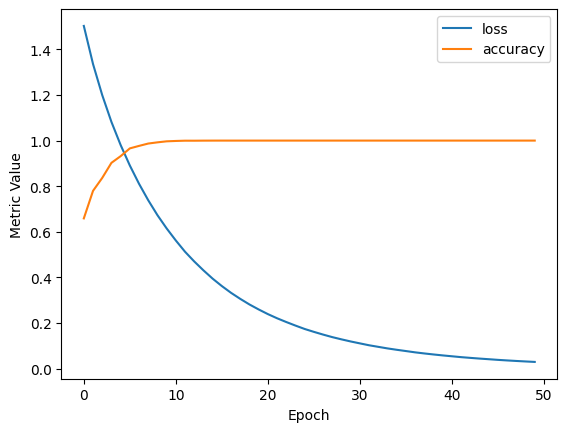

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

Define the Inference Models
During training, the decoder received the correct previous word character as input (teacher forcing). During inference, we don't have the correct next character, so we generate it step by step.

In [ ]:
# Encoder model for inference
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder model for inference
decoder_state_input_h = Input(shape=(128,))
decoder_state_input_c = Input(shape=(128,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)


 Define a Function for Decoding
Now, let's create a function to predict a word from a given SHA-256 hash.

In [ ]:


def decode_sequence(input_text):
    # Convert encrypted text to numerical input
    input_seq = np.array([encode_word(input_text, max_word_length)]).reshape(1, max_word_length, 1)

    # Get encoder states
    states_value = encoder_model.predict(input_seq)

    # Prepare decoder input
    target_seq = np.zeros((1, max_word_length, 1))

    # Generate characters step-by-step
    decoded_word = ""
    for i in range(max_word_length):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Get predicted character index
        sampled_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_char.get(sampled_index, "")

        if sampled_char == "":  # Stop if unknown or padding
            break

        decoded_word += sampled_char

        # Update decoder input and states
        target_seq[0, i, 0] = sampled_index
        states_value = [h, c]

    return decoded_word

model

In [ ]:
test_word = "hello"
encrypted_test_word = caesar_cipher(test_word, shift)

predicted_word = decode_sequence(encrypted_test_word)
print(f"Encrypted: {encrypted_test_word}, Decrypted: {predicted_word}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Original: random, Predicted: aaaaaa
